In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Setup Seaborn
sns.set_style("dark")
sns.set_context("talk", font_scale=0.9)

In [2]:
data = pd.read_csv("C:\\Users\\savit\\AppData\\Local\\Temp\\Temp1_Vehicle_policies_2020.csv.zip\\Vehicle_policies_2020.csv")

In [3]:
df = data.sample(n=3000)

In [4]:
df.isnull().sum()

pol_number           0
pol_eff_dt           0
gender               0
agecat             243
date_of_birth        0
credit_score       136
area                 0
traffic_index      187
veh_age              0
veh_body             0
veh_value            0
claim_office      2513
numclaims            0
claimcst0            0
annual_premium       0
dtype: int64

In [6]:
df['agecat'].mean()

3.5030830612985127

In [7]:
df['agecat'] = df['agecat'].fillna(3.50)

In [8]:
df['credit_score'].mean()

657.3645251396648

In [9]:
df['credit_score'] = df['credit_score'].fillna(657.36)

In [10]:
df['traffic_index'].mean()

103.75023107003194

In [11]:
df['traffic_index'] = df['traffic_index'].fillna(103.75)

In [12]:
df.isnull().sum()

pol_number           0
pol_eff_dt           0
gender               0
agecat               0
date_of_birth        0
credit_score         0
area                 0
traffic_index        0
veh_age              0
veh_body             0
veh_value            0
claim_office      2513
numclaims            0
claimcst0            0
annual_premium       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 52272 to 55964
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pol_number      3000 non-null   int64  
 1   pol_eff_dt      3000 non-null   object 
 2   gender          3000 non-null   object 
 3   agecat          3000 non-null   float64
 4   date_of_birth   3000 non-null   object 
 5   credit_score    3000 non-null   float64
 6   area            3000 non-null   object 
 7   traffic_index   3000 non-null   float64
 8   veh_age         3000 non-null   int64  
 9   veh_body        3000 non-null   object 
 10  veh_value       3000 non-null   float64
 11  claim_office    487 non-null    object 
 12  numclaims       3000 non-null   int64  
 13  claimcst0       3000 non-null   float64
 14  annual_premium  3000 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 375.0+ KB


In [14]:
df = df.replace(['?'],'NaN')

In [15]:
df['claim_office'].value_counts()

B    212
D    135
A    100
C     40
Name: claim_office, dtype: int64

In [16]:
df.dropna(axis=0, inplace=True)

In [17]:
df.shape

(487, 15)

In [18]:
df.isnull().sum()

pol_number        0
pol_eff_dt        0
gender            0
agecat            0
date_of_birth     0
credit_score      0
area              0
traffic_index     0
veh_age           0
veh_body          0
veh_value         0
claim_office      0
numclaims         0
claimcst0         0
annual_premium    0
dtype: int64

In [19]:
df.head()

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
52272,13963521,2/19/2020,M,1.0,6/19/1995,336.0,A,73.9,1,UTE,2.431,D,1,19727.271860,716.53
25127,56573927,8/2/2020,F,2.0,10/22/1984,407.0,D,118.9,2,HBACK,1.936,D,1,4558.175300,716.53
11378,55967010,10/23/2020,M,1.0,7/2/1996,751.0,B,101.5,4,SEDAN,0.484,A,1,242.091289,716.53
42049,16151950,4/22/2020,F,2.0,4/13/1986,527.0,D,109.8,3,SEDAN,1.683,B,1,1841.047944,716.53
44746,77542468,4/5/2020,M,1.0,8/21/1998,650.0,A,80.4,3,HBACK,0.759,A,1,140.573542,716.53


In [20]:
df_corr = df.corr()

In [21]:
df_corr

,pol_number,agecat,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium
pol_number,1.000000,-0.034412,-0.084941,-0.077827,0.086686,-0.062833,-0.078329,-0.005285,NaN
agecat,-0.034412,1.000000,0.127805,0.092444,-0.008588,-0.098306,0.089355,0.083521,NaN
credit_score,-0.084941,0.127805,1.000000,0.070500,-0.019652,-0.012212,0.033808,-0.343257,NaN
traffic_index,-0.077827,0.092444,0.070500,1.000000,-0.010742,-0.017857,0.017288,-0.056243,NaN
veh_age,0.086686,-0.008588,-0.019652,-0.010742,1.000000,-0.567722,0.005418,-0.334586,NaN
veh_value,-0.062833,-0.098306,-0.012212,-0.017857,-0.567722,1.000000,0.055490,0.312530,NaN
numclaims,-0.078329,0.089355,0.033808,0.017288,0.005418,0.055490,1.000000,0.275121,NaN
claimcst0,-0.005285,0.083521,-0.343257,-0.056243,-0.334586,0.312530,0.275121,1.000000,NaN
annual_premium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

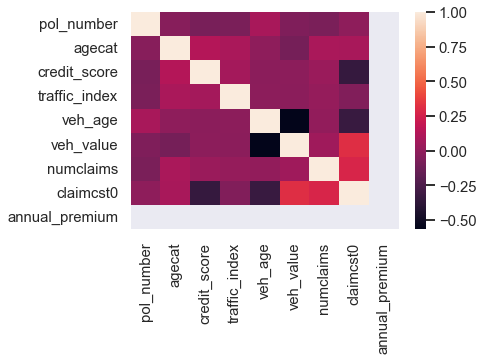

In [22]:
sns.heatmap(df_corr)

In [25]:
num_atr = ['pol_number','pol_eff_dt','gender','agecat','date_of_birth','credit_score','area','traffic_index','veh_age','veh_body','veh_value','claim_office','annual_premium']

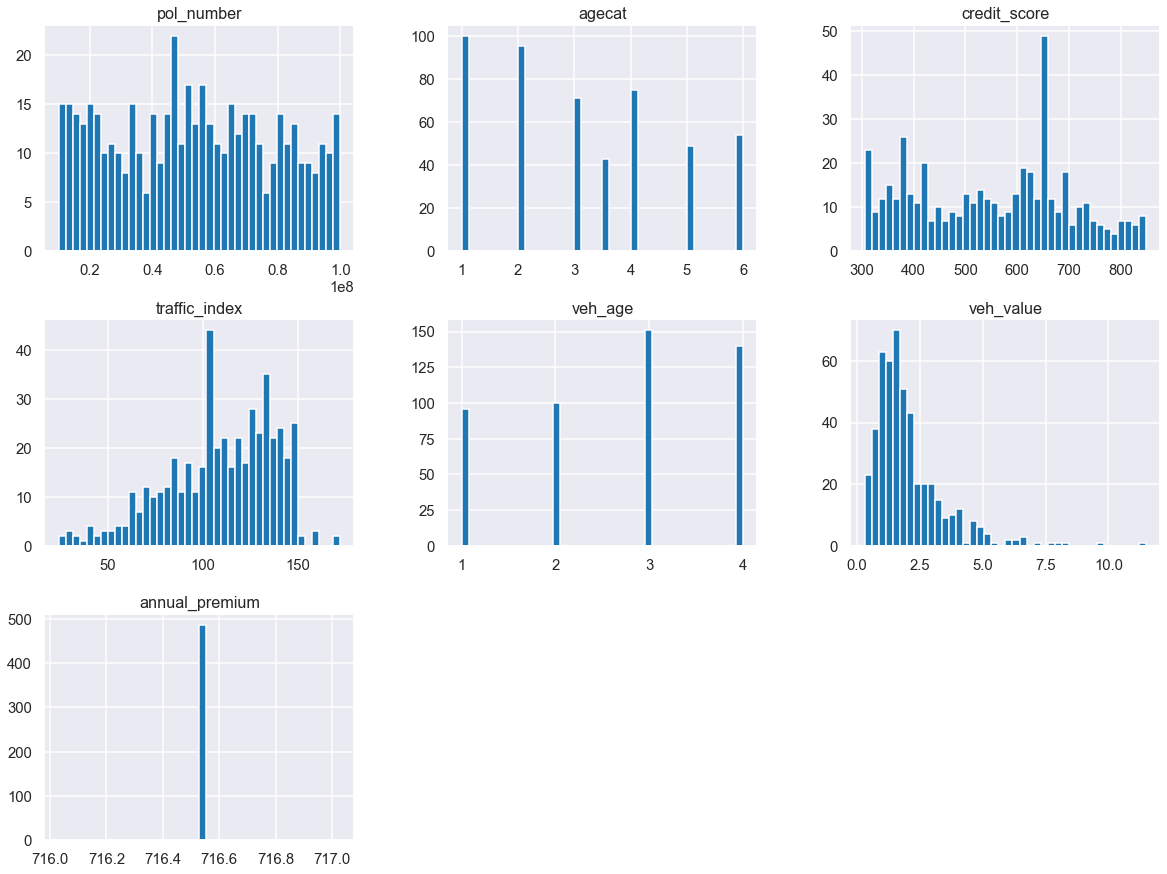

In [26]:
df[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()

In [27]:
df.head()

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
52272,13963521,2/19/2020,M,1.0,6/19/1995,336.0,A,73.9,1,UTE,2.431,D,1,19727.271860,716.53
25127,56573927,8/2/2020,F,2.0,10/22/1984,407.0,D,118.9,2,HBACK,1.936,D,1,4558.175300,716.53
11378,55967010,10/23/2020,M,1.0,7/2/1996,751.0,B,101.5,4,SEDAN,0.484,A,1,242.091289,716.53
42049,16151950,4/22/2020,F,2.0,4/13/1986,527.0,D,109.8,3,SEDAN,1.683,B,1,1841.047944,716.53
44746,77542468,4/5/2020,M,1.0,8/21/1998,650.0,A,80.4,3,HBACK,0.759,A,1,140.573542,716.53


In [28]:
df.drop(['pol_eff_dt'], axis=1, inplace=True)
df.drop(['gender'], axis=1, inplace=True)
df.drop(['date_of_birth'], axis=1, inplace=True)
df.drop(['area'], axis=1, inplace=True)
df.drop(['veh_body'], axis=1, inplace=True)
df.drop(['claim_office'], axis=1, inplace=True)

In [29]:
df.head()

,pol_number,agecat,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium
52272,13963521,1.0,336.0,73.9,1,2.431,1,19727.271860,716.53
25127,56573927,2.0,407.0,118.9,2,1.936,1,4558.175300,716.53
11378,55967010,1.0,751.0,101.5,4,0.484,1,242.091289,716.53
42049,16151950,2.0,527.0,109.8,3,1.683,1,1841.047944,716.53
44746,77542468,1.0,650.0,80.4,3,0.759,1,140.573542,716.53


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 52272 to 14646
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pol_number      487 non-null    int64  
 1   agecat          487 non-null    float64
 2   credit_score    487 non-null    float64
 3   traffic_index   487 non-null    float64
 4   veh_age         487 non-null    int64  
 5   veh_value       487 non-null    float64
 6   numclaims       487 non-null    int64  
 7   claimcst0       487 non-null    float64
 8   annual_premium  487 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 38.0 KB


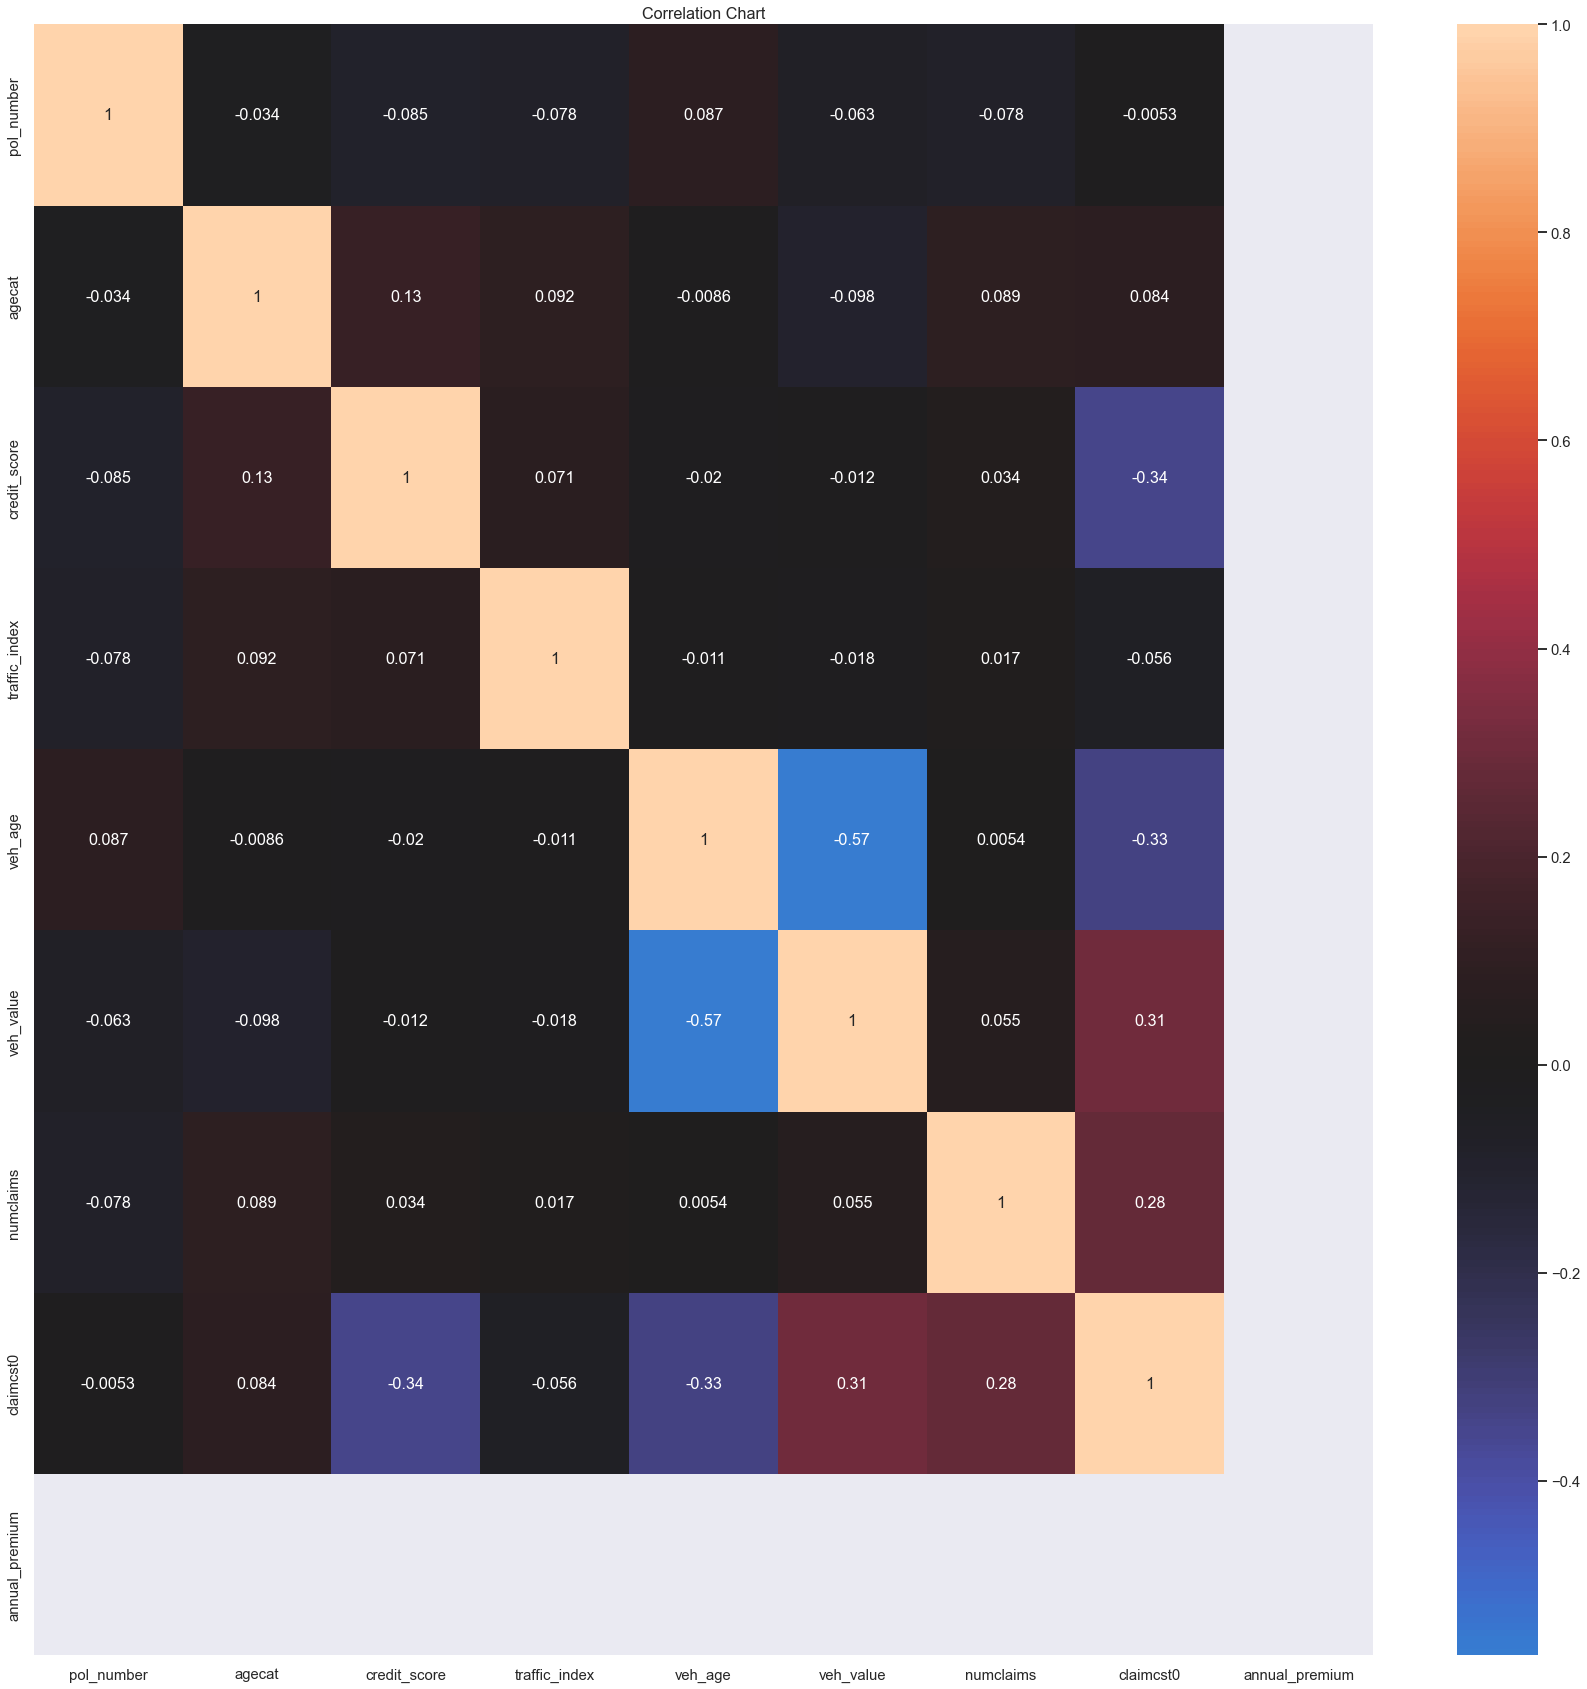

In [31]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title("Correlation Chart")
plt.show()

<Figure size 432x288 with 0 Axes>

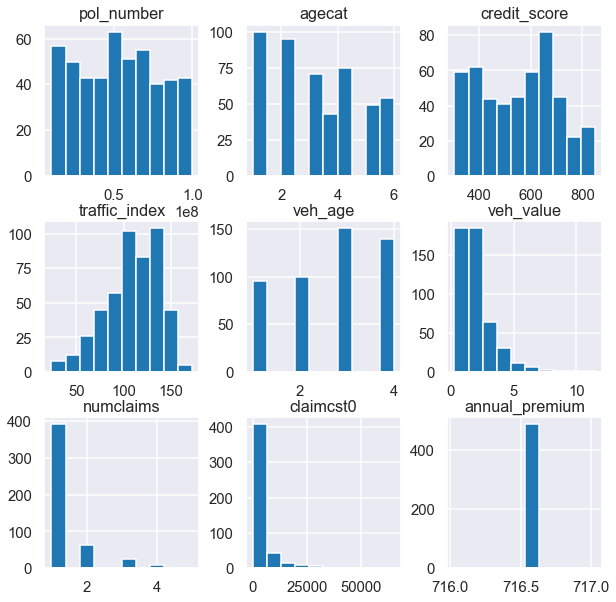

<Figure size 432x288 with 0 Axes>

In [32]:
df.hist(figsize=(10,10))
plt.figure()

In [34]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(df)
df_scaled_array = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled_array, columns = df.columns)

df_scaled.sample(10)

,pol_number,agecat,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium
314,0.225133,-1.324545,0.080638,-0.103420,-1.551264,0.070290,-0.436552,0.408177,0.0
147,1.338250,0.544272,0.510521,1.705966,1.205909,-0.769435,-0.436552,-0.460711,0.0
73,-1.024388,-1.324545,0.309013,0.435172,-1.551264,0.653432,-0.436552,-0.127369,0.0
2,0.100890,-1.324545,1.329985,-0.279430,1.205909,-1.111545,-0.436552,-0.515179,0.0
11,1.284059,0.544272,1.820320,0.477414,-0.632206,1.866368,-0.436552,-0.527041,0.0
414,0.280102,-0.078667,0.436635,0.822394,0.286852,0.700084,1.039843,0.185924,0.0
114,-1.054248,-0.701606,0.060488,0.477414,1.205909,-0.124091,-0.436552,-0.361615,0.0
298,-1.348553,0.232803,0.651576,0.899839,-1.551264,0.085840,-0.436552,-0.421032,0.0
245,-0.293634,-1.324545,-0.080568,0.836475,-0.632206,2.978226,-0.436552,0.320059,0.0
257,-0.797562,-0.078667,-1.363499,-0.187905,-1.551264,3.608019,-0.436552,0.714948,0.0


In [36]:
from sklearn.cluster import KMeans

nclusters = 2 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(df_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(df_scaled)
y_cluster_kmeans

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,

In [37]:
from sklearn import metrics
score = metrics.silhouette_score(df_scaled, y_cluster_kmeans)
score

0.20678616551313356

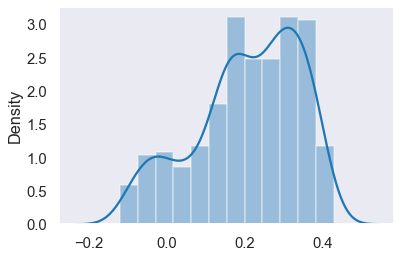

In [38]:
scores = metrics.silhouette_samples(df_scaled, y_cluster_kmeans)
sns.distplot(scores);

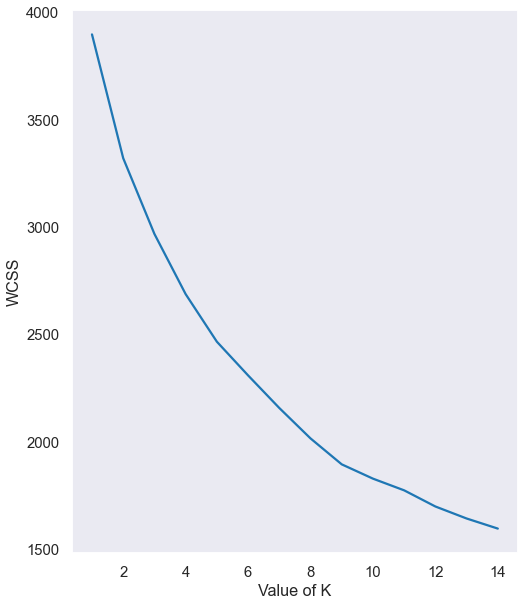

In [40]:
#K-Means Clustering
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(df_scaled)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (8, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("Value of K")
plt.ylabel("WCSS")
plt.show()

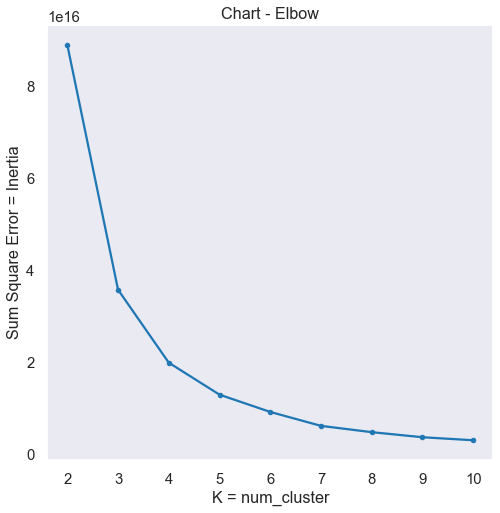

In [44]:
from sklearn.cluster import KMeans

x_cols = np.array(df.iloc[:, :32])
ss = [];
ks = range(2, 11)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=2)
    labels = kmeans.fit_predict(x_cols)
    ss.append(kmeans.inertia_)
f, axes = plt.subplots(figsize=(8, 8))
axes.plot(ks, ss, marker='.')
axes.set(xlabel='K = num_cluster', ylabel = 'Sum Square Error = Inertia', title = 'Chart - Elbow')
plt.show()

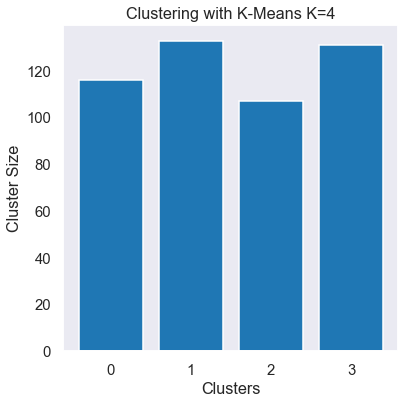

In [45]:
# Pick 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1)
df['labels'] = kmeans.fit_predict(x_cols)
cluster_size = df.labels.value_counts()
f, axes = plt.subplots(figsize=(6, 6))
axes.bar(cluster_size.index, cluster_size)
axes.set(xlabel='Clusters', ylabel='Cluster Size', title='Clustering with K-Means K=4')
plt.show()
df= df.drop('labels', axis=1)

In [46]:
# Type of Clustering- Agglomerative
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
algo_sil_score = pd.DataFrame(index=[ 'Agglomerative Clustering'])
algo_sil_score['algo_avg_silhouette_score']=0
algo_sil_score['cluster_size']=0

k_range = range(2, 11)
l_types = ['ward', 'complete', 'average']
#l_types = ['complete']
max_sil_score = -np.inf
best_k, best_l = None, None
for k in k_range:
    for l in l_types:
        ac = AgglomerativeClustering(n_clusters=k, linkage=l)
        labels = ac.fit_predict(x_cols)
        score = metrics.silhouette_score(x_cols, labels)
        (best_k, best_l, max_sil_score) = (k, l, score) if score>max_sil_score else (best_k, best_l, max_sil_score)
        #print(k, l, score, max_sil_score)
print('Best num cluster = {0:d}, Best linkage = {1}, Best silhouette score = {2:.3f}'.format(best_k, best_l, max_sil_score))

ac = AgglomerativeClustering(n_clusters=best_k, linkage=best_l)
labels = ac.fit_predict(x_cols)
print('Average Silhouette Score: {0:.3f}'.format(metrics.silhouette_score(x_cols, labels)))
algo_sil_score.loc['Agglomerative Clustering'] = [max_sil_score, best_k]

Best num cluster = 2, Best linkage = complete, Best silhouette score = 0.586
Average Silhouette Score: 0.586
